In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file and checking the first five observation

In [18]:
df = pd.read_csv('input_main.csv')
df.head()

,Unnamed: 0,DEPTH,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,BVW,KLOGH,PHIF,SW,VCL,pp_psi
0,0,3127.7052,87.701897,28.952101,0.2170,38.960499,2.2082,6.3016,95.438400,130.219100,0.0195,733.528686,0.2483,0.0785,0.1245,4641.506076
1,1,3127.8576,87.051201,29.013000,0.2168,40.557701,2.2143,6.3473,103.421096,127.670898,0.0196,695.894897,0.2461,0.0797,0.1251,4641.825160
2,2,3128.0100,87.711700,29.101200,0.2166,42.197201,2.2200,6.3964,110.710601,125.064598,0.0197,658.749694,0.2441,0.0809,0.1260,4642.428943
3,3,3128.1624,87.745697,29.576700,0.2178,44.440498,2.2200,6.4939,108.128898,121.629501,0.0200,604.472290,0.2445,0.0818,0.1305,4643.317427
4,4,3128.3148,88.152100,30.052200,0.2190,46.683899,2.2200,6.5915,105.547302,118.194396,0.0203,554.666870,0.2450,0.0827,0.1351,4644.490611


In [19]:
df.describe()

,Unnamed: 0,DEPTH,DT,GR,NPHI,RD,RHOB,ROP5_RM,RS,RT,BVW,KLOGH,PHIF,SW,VCL,pp_psi
count,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000,1811.000000
mean,905.000000,3265.627200,82.924606,64.187431,0.197347,52.902522,2.354985,17.975494,62.012965,52.664780,0.065822,142.035545,0.177494,0.502311,0.395952,4823.872940
std,522.934986,79.695292,7.214627,21.683044,0.029836,150.759072,0.132375,8.504518,262.090451,123.373354,0.041805,650.313086,0.070897,0.378339,0.200656,182.598023
min,0.000000,3127.705200,56.836101,22.446199,0.111200,0.490000,2.150600,3.402200,0.550000,0.631600,0.001200,0.001000,0.001200,0.037500,0.060100,4471.360946
25%,452.500000,3196.666200,78.467350,49.482050,0.173900,1.328600,2.227950,10.042850,1.405200,1.484700,0.030400,0.045250,0.110650,0.130550,0.232400,4681.541009
50%,905.000000,3265.627200,83.869400,62.143501,0.197900,3.609600,2.352400,15.025900,4.110700,5.638300,0.058500,1.492700,0.193800,0.363800,0.383800,4717.959232
75%,1357.500000,3334.588200,87.778801,80.317951,0.220100,35.303099,2.470000,27.437750,38.667101,44.383049,0.095850,24.359000,0.239050,0.960750,0.543950,4993.448717
max,1810.000000,3403.549200,100.426902,122.869102,0.285300,1319.274040,2.688000,28.574400,4693.473140,749.070617,0.172000,12109.040000,0.282700,1.000000,1.000000,5355.864002


In [20]:
# selecting features and label
X = df.iloc[:, 1:-1]  # features
y = df.iloc[:,-1]  #label

In [21]:
[X.shape, y.shape]

[(1811, 14), (1811,)]

In [22]:
# spliting into training and testing set for both X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2 )

# Standardization
from sklearn.preprocessing import StandardScaler

# transforming X_train value to feed to the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transforming X_test value for predicting for new cases
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [24]:
# function to convert seconds to into hours, minutes and seconds
# this function is used to measure the running time of any model
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d:%02d" % (hour, minutes, seconds)

In [25]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

start = time.time()

# Define base regressors
degree =2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
rf=RandomForestRegressor()
cb=CatBoostRegressor()
# Define StackingCVRegressor
stacking_regressor = StackingCVRegressor(
    regressors=[rf,model],
    meta_regressor=cb,
    cv=5
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
stacking_regressor.fit(X_train_pca, y_train)

Learning rate set to 0.042503
0:	learn: 175.1151518	total: 3.17ms	remaining: 3.17s
1:	learn: 168.2931040	total: 5.85ms	remaining: 2.92s
2:	learn: 161.8642549	total: 8.31ms	remaining: 2.76s
3:	learn: 155.8815893	total: 11.5ms	remaining: 2.85s
4:	learn: 149.9518734	total: 14.3ms	remaining: 2.85s
5:	learn: 144.4362560	total: 17.2ms	remaining: 2.85s
6:	learn: 138.8714794	total: 20ms	remaining: 2.84s
7:	learn: 133.4971642	total: 22.7ms	remaining: 2.81s
8:	learn: 128.3606694	total: 25.9ms	remaining: 2.85s
9:	learn: 123.5291469	total: 29.1ms	remaining: 2.88s
10:	learn: 118.9091524	total: 31.7ms	remaining: 2.85s
11:	learn: 114.4405434	total: 34.5ms	remaining: 2.84s
12:	learn: 110.1436217	total: 37.3ms	remaining: 2.83s
13:	learn: 106.1647750	total: 40.3ms	remaining: 2.84s
14:	learn: 102.3218520	total: 43ms	remaining: 2.82s
15:	learn: 98.6518077	total: 46.5ms	remaining: 2.86s
16:	learn: 95.0370474	total: 49.1ms	remaining: 2.84s
17:	learn: 91.6871540	total: 51.7ms	remaining: 2.82s
18:	learn: 88.4

StackingCVRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x00000197CC002310>,
                    regressors=[RandomForestRegressor(),
                                Pipeline(steps=[('polynomialfeatures',
                                                 PolynomialFeatures()),
                                                ('linearregression',
                                                 LinearRegression())])])

In [27]:
pred_1 = stacking_regressor.predict(X_train_pca)
pred_2= stacking_regressor.predict(X_test_pca)

In [28]:
import os

# Create the output/cnn directory if it doesn't exist
output_dir = "./output/pca_10"
os.makedirs(output_dir, exist_ok=True)

In [29]:
# saving training, testing and y data with their predicted data in a excel file with different sheets
a = np.stack([y_train, pred_1], axis=1) # training
a = pd.DataFrame(a, columns=['y_train', 'y_train_pred'])

b = np.stack([y_test, pred_2], axis=1) # testing 
b = pd.DataFrame(b, columns=['y_test', 'y_test_pred'])

with pd.ExcelWriter("./output/pca_10/predicted_model.xlsx") as writer:
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    a.to_excel(writer, sheet_name="training", index=True)
    b.to_excel(writer, sheet_name="testing", index=True)

### Evaluation Metrics for testing set

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error


train_r2 = r2_score(y_train,pred_1) # r2_score for training set
train_mae = mean_absolute_error(y_train, pred_1) # mean absolute error for training set
train_mse = mean_squared_error(y_train, pred_1) # mean squared error for training set
train_rmse = np.sqrt(mean_squared_error(y_train, pred_1)) # mean squared error for training set
train_mape = mean_absolute_percentage_error(y_train, pred_1) # mean_absolute_percentage_error for training set
train_ev = explained_variance_score(y_train, pred_1) 
train_maxE = max_error(y_train, pred_1)
train_minE = min(abs(y_train - pred_1))

test_r2 = r2_score(y_test, pred_2) # r2_score for testing set
test_mae = mean_absolute_error(y_test, pred_2) # mean absolute error for testing set
test_mse = mean_squared_error(y_test, pred_2) # mean squared error for testing set
test_rmse = np.sqrt(mean_squared_error(y_test, pred_2))
test_mape = mean_absolute_percentage_error(y_test, pred_2) # mean_absolute_percentage_error for testing set
test_ev = explained_variance_score(y_test, pred_2) 
test_maxE = max_error(y_test, pred_2)
test_minE = min(abs(y_test - pred_2))


metrics = {
'performance_metrics': ['R2', 'MAE', 'MSE','RMSE','MAPE', 'EV', 'maxE', 'minE'],
'training': [train_r2, train_mae, train_mse, train_rmse,train_mape, train_ev, train_maxE, train_minE],
'testing': [test_r2, test_mae, test_mse,test_rmse, test_mape, test_ev, test_maxE, test_minE]
}

performance_metrics = pd.DataFrame(metrics)
performance = performance_metrics.transpose()
performance.to_csv('./output/pca_10/performance_.csv')
performance

,0,1,2,3,4,5,6,7
performance_metrics,R2,MAE,MSE,RMSE,MAPE,EV,maxE,minE
training,0.993152,7.413075,227.251366,15.074859,0.00154,0.993155,155.727493,0.014659
testing,0.983768,11.088892,545.739922,23.361077,0.002298,0.983812,241.640271,0.015276


In [31]:
#from sklearn.externals import joblib
from joblib import dump, load
dump(stacking_regressor, './output/pca_10/trained_model.joblib') 

#clf = load('trained_linear_regression_model.joblib')

['./output/pca_10/trained_model.joblib']

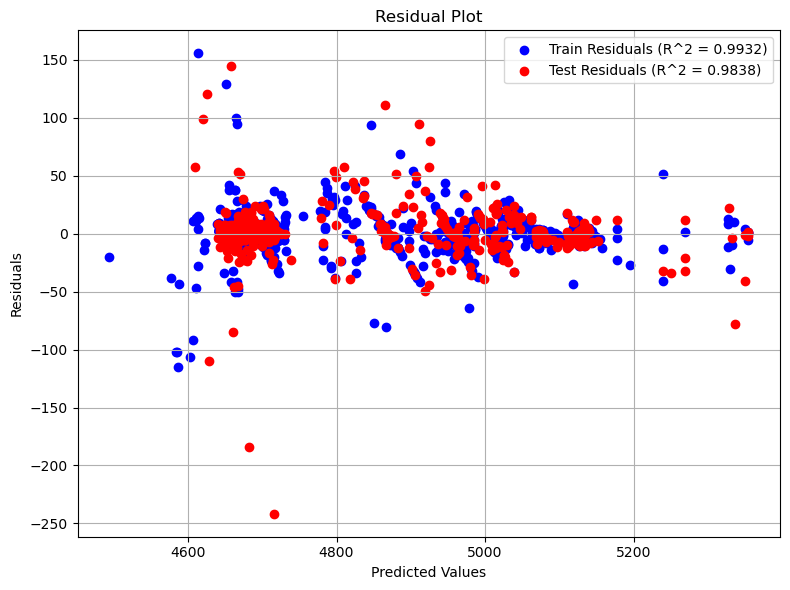

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score



train_residuals = y_train - pred_1
test_residuals = y_test - pred_2

fig, ax = plt.subplots(figsize=(8, 6))


ax.scatter(pred_1, train_residuals, c='blue', label=f'Train Residuals (R^2 = {train_r2:.4f})')

ax.scatter(pred_2, test_residuals, c='red', label=f'Test Residuals (R^2 = {test_r2:.4f})')


ax.legend()


ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')


ax.grid(True)

plt.savefig('./output/pca_10/residual_plot.png', dpi=300)
plt.tight_layout()


### Regression plot for testing set